In [58]:
#線形回帰

In [59]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画

In [60]:
#df_house = pd.read_csv("./car-consume/measurements.csv")[['distance', 'consume', 'speed', 'temp_inside', 'temp_outside', 'specials', 'gas_type','AC', 'rain', 'sun','refill liters', 'refill gas']]
#CSVだとうまくいかないからEXCELにしてみた。
###変数houseはあとでなおす
df_house = pd.read_excel("./car-consume/measurements2.xlsx")

# データを確認
display(df_house.head())
df_house.describe()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [61]:
#欠損値０埋め
#ValueError: Input contains NaN, infinity or a value too large for dtype('float64').でないように
df_house = df_house.fillna(0)

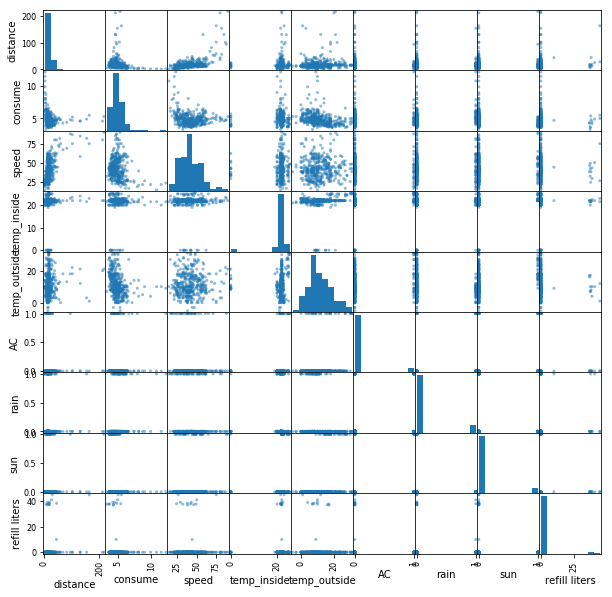

In [62]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_house, figsize=(10,10))
plt.show()

In [63]:
# 相関係数を確認
df_house.corr()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
distance,1.000000,-0.128967,0.562299,0.053597,0.088175,-0.025738,-0.019791,0.081120,0.107045
consume,-0.128967,1.000000,-0.227866,0.027015,-0.320811,0.096591,0.248118,-0.170667,-0.074095
speed,0.562299,-0.227866,1.000000,0.026817,0.015411,-0.035408,0.009489,0.081618,-0.007446
temp_inside,0.053597,0.027015,0.026817,1.000000,0.077181,0.125307,0.011845,0.060782,0.025983
temp_outside,0.088175,-0.320811,0.015411,0.077181,1.000000,0.167562,-0.186315,0.346903,-0.041595
AC,-0.025738,0.096591,-0.035408,0.125307,0.167562,1.000000,0.242915,0.088598,-0.052571
rain,-0.019791,0.248118,0.009489,0.011845,-0.186315,0.242915,1.000000,-0.112650,0.033505
sun,0.081120,-0.170667,0.081618,0.060782,0.346903,0.088598,-0.112650,1.000000,-0.054448
refill liters,0.107045,-0.074095,-0.007446,0.025983,-0.041595,-0.052571,0.033505,-0.054448,1.000000


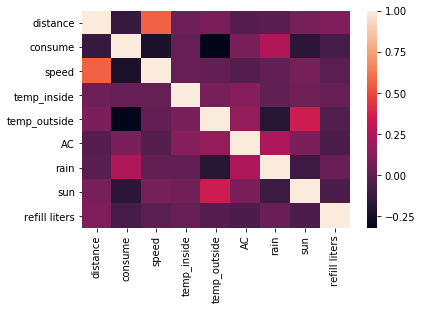

In [64]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_house.corr())
plt.show()

In [65]:
# 係数を求める
y = df_house["consume"].values
X = df_house[['distance', 'speed', 'temp_inside', 'temp_outside', 'AC', 'sun']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]
w4 = regr.coef_[3]
w5 = regr.coef_[4]
w6 = regr.coef_[5]

In [66]:
x1 = df_house['distance'].values
x2 = df_house['speed'].values
x3 = df_house['temp_inside'].values
x4 = df_house['temp_outside'].values
x5 = df_house['AC'].values
x6 = df_house['sun'].values

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3 * x3 + w4 * x4 + w5 * x5 + w6 * x6
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, w4 = {:.3f}, w5 = {:.3f}, w6 = {:.3f}'.format(w0, w1, w2, w3, w4, w5, w6))
print('二乗誤差 = {:.3f}'.format(squared_error))

w0 = 5.921, w1 = 0.002, w2 = -0.018, w3 = 0.011, w4 = -0.049, w5 = 0.556, w6 = -0.210
二乗誤差 = 169.624


In [67]:
#もうすぐ東京なのであきらめ